In [1]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

In [4]:
# get current working directory
cwd = os.getcwd()

In [7]:
%cd /Users/efz/British Airline Data Science Virtual Internship Program

file_path = "./customer_booking.csv"

df = pd.read_csv(file_path, encoding="ISO-8859-1")

print(df.head())

/Users/efz/British Airline Data Science Virtual Internship Program
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_

In [8]:
df = df.reset_index(drop=True)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [9]:
df_final = df

In [10]:
#Scikit-learn, commonly abbreviated as sklearn
#a popular machine learning library for Python that works with pandas,matpplotlib
#provides a range of tools for data mining, data analysis, and machine learning.
#Machine Learning: classification,clustering, regression,dimensionality reduction,etc
#Scikit-learn also covers model evaluation and optimization tools


In [11]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [12]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)


In [13]:
#store the label for supervised learning
label = df['booking_complete']

In [14]:
df_final = df_final.drop('booking_complete', axis=1)

In [15]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,Sat,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,Sat,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,Wed,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,Sat,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,Wed,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,Sat,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,Sun,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,Sat,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,Mon,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


In [26]:
## Normalizaing the values - Data Preprocessing
## We have non-numeric value in the dataset
## and therefore we should pre-process the dataset to remove non-numeric column

# create a copy of the original dataframe
df = df_final.copy()

# select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_final_numeric = df[numeric_cols]

# create a standard scaler object
scaler = StandardScaler()

# fit and transform the data
scaled_df_final_numeric  = scaler.fit_transform(df_final_numeric)

#create a dataframe of scled data
scaled_df_final_numeric = pd.DataFrame(scaled_df_final_numeric, columns = df_final_numeric.columns)

In [27]:
# add the labels back to the dataframe
scaled_df_final_numeric['label']  = label

In [28]:
scaled_df_final_numeric

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


<AxesSubplot:>

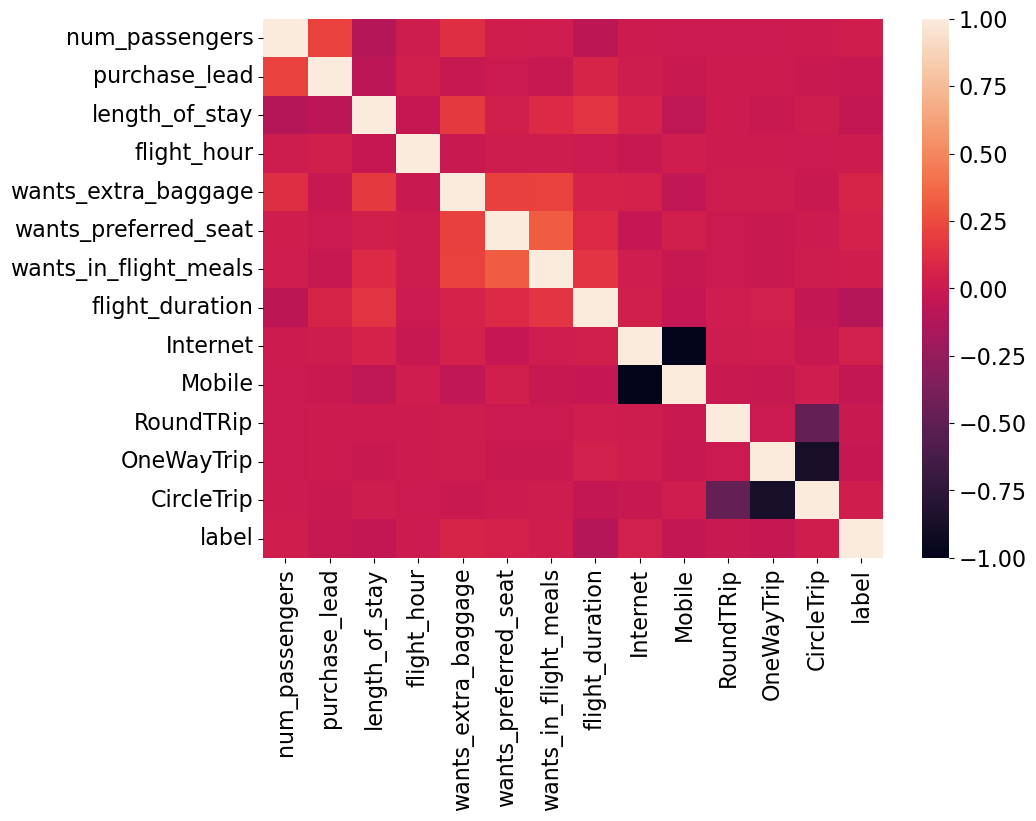

In [29]:
##Correlation matrix
corr = scaled_df_final_numeric.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

In [30]:
##Splitting Train and Test Data

from sklearn.model_selection import train_test_split

X = scaled_df_final_numeric.iloc[:,:-1]
y = scaled_df_final_numeric['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

!pip install yellowbrick

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 3.3 MB/s eta 0:00:0000:0100:01


In [40]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

## Random Forest Classifier
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [41]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.71 respectively


In [42]:
## Random Forecast Classifier
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [43]:
##Checking Training accuracy
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")


Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.71 respectively


0.93175

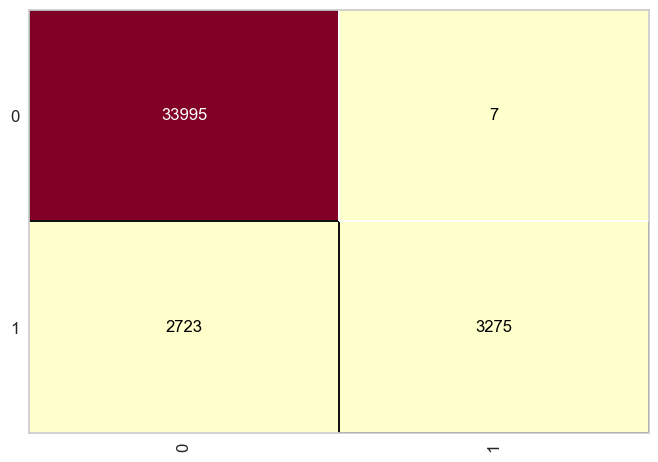

In [44]:

cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

In [45]:
## Checking Testing accuracy
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.4 and 0.08 respectively


0.8483

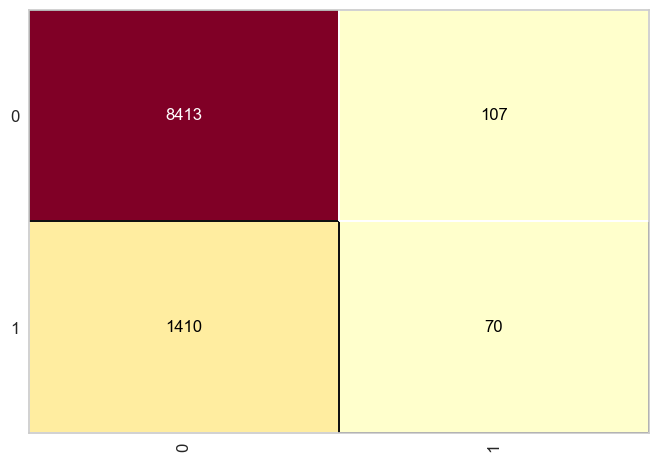

In [46]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

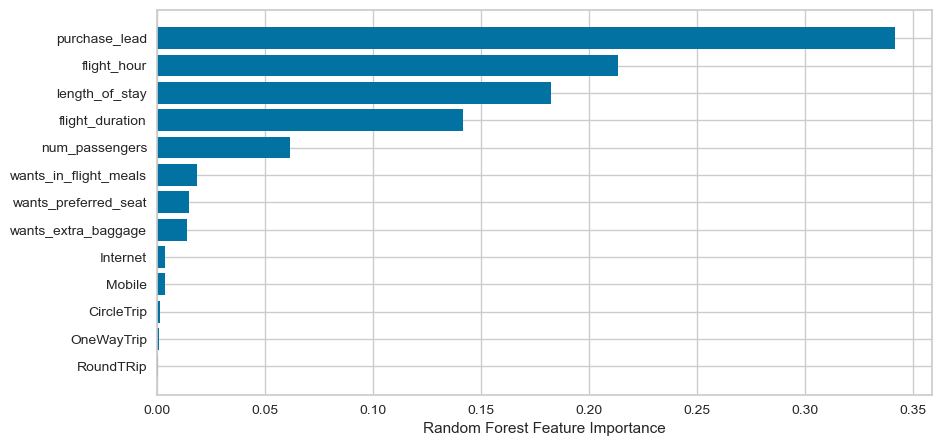

In [48]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df_final_numeric.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [50]:
## Balancing the dataset
scaled_df_final_numeric.label.value_counts()

0    42522
1     7478
Name: label, dtype: int64

In [54]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_final_numeric_0 = scaled_df_final_numeric[scaled_df_final_numeric.label ==0].sample(n=8000)

In [56]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_final_numeric_new = pd.concat([scaled_df_final_numeric[scaled_df_final_numeric.label==1], scaled_df_final_numeric_0], ignore_index=True)

In [57]:
#shuffle the dataframe rows
scaled_df_final_numeric_new = scaled_df_final_numeric_new.sample(frac = 1).reset_index(drop=True)

In [58]:
scaled_df_final_numeric_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,-0.579559,-0.662688,0.323290,0.172497,-1.420965,-0.649919,-0.863497,0.870121,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,0.400684,1.139403,-0.502977,0.357251,0.703747,1.538654,1.158082,-0.185430,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,-0.579559,0.055937,1.120048,-0.197010,0.703747,-0.649919,-0.863497,-1.688589,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,-0.684800,-0.148863,0.357251,0.703747,1.538654,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
4,-0.579559,-0.717967,2.359449,0.357251,0.703747,1.538654,1.158082,0.870121,-2.810688,2.810688,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,0.400684,2.355538,-0.561996,0.911513,0.703747,-0.649919,-0.863497,-0.185430,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15474,0.400684,0.531335,0.559367,-0.012257,0.703747,1.538654,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15475,-0.579559,-0.375238,-0.502977,-0.012257,0.703747,-0.649919,-0.863497,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15476,1.380928,-0.132011,1.297105,0.726759,0.703747,1.538654,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


In [59]:
X = scaled_df_final_numeric_new.iloc[:,:-1]
y = scaled_df_final_numeric_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [61]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=100,max_depth =50 , min_samples_split=5,random_state=0)

In [63]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.61, 0.59, 0.59, 0.63 and 0.59 respectively


0.6088501291989664

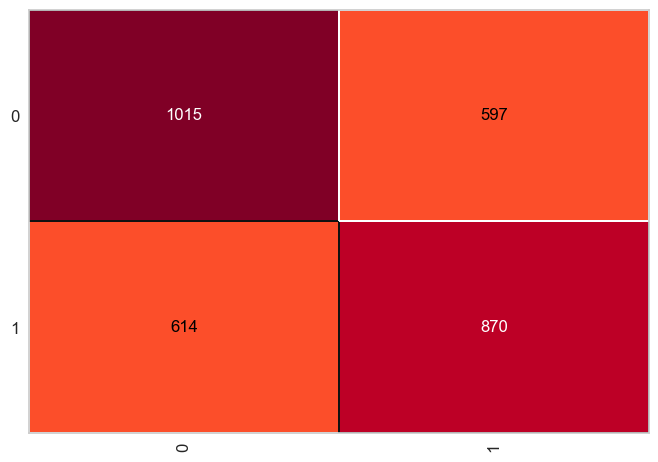

In [64]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

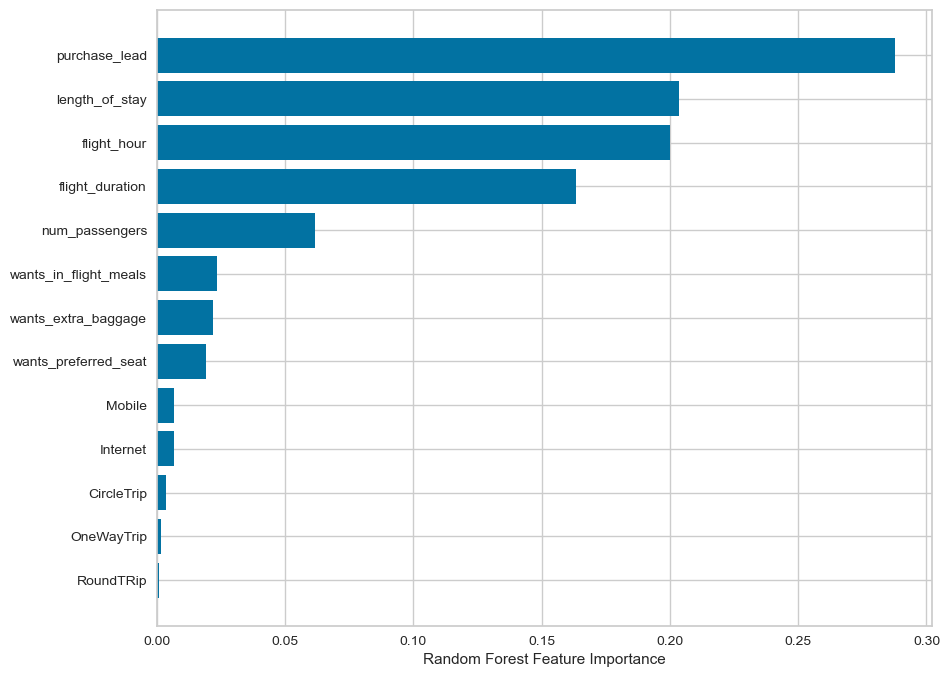

In [67]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df_final_numeric.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")